In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from tqdm import tqdm_notebook
import pyemma

In [2]:
# Symbols
x = symbols('x')
m = symbols('mu')
s = symbols('sigma')

# Potential
U = -log(exp(-(x-m)**2/(2*s**2)) + exp(-(x+m)**2/(2*s**2)))

# Brownian Dynamics Parameters
KT = symbols('k_{B}T')
Ddt = symbols('Ddt')
R = symbols('R')

# Other Parameters
maxt = 100
dt = 0.001

# Forces
F1 = simplify(-diff(U, x))*Ddt/KT
F2 = sqrt(2*Ddt)*R
F = F1 + F2

/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


In [68]:
def kramers(U, M, S):
    U_ = U.subs(m, M).subs(s, S)
    U0 = U_.subs(x, 0)
    Um = U_.subs(x, M)
    dE = U0-Um
    U_1 = diff(U, x)
    U_2 = diff(U_1, x)
    Wa = sqrt(U_2.subs(x, M).subs(m, M).subs(s, S))
    Wb = sqrt(abs(U_2.subs(x, 0).subs(m, M).subs(s, S)))
    k = 2*pi/(Wa*Wb)*exp(dE)
    return k.evalf()

In [141]:
kr_data = np.loadtxt('../data/kr_all.data')[:]
ms = kr_data[:,0]
kr_theory = np.array([kramers(U, M, 1) for M in ms])

Text(0,0.5,'$\\tau$[steps]')

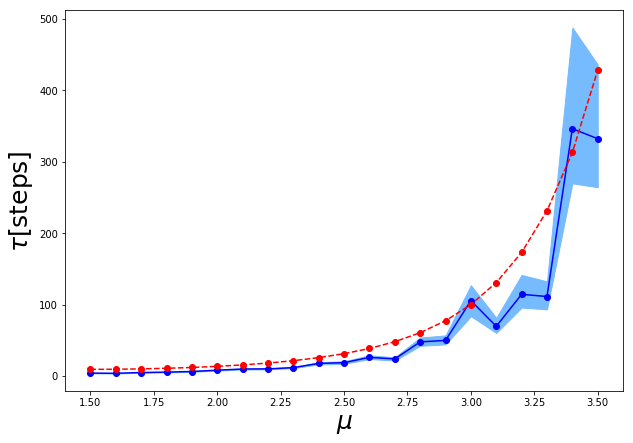

In [142]:
fig, axes = plt.subplots(1, 1, figsize=(10, 7))
plt.fill_between(ms, kr_data[:,2], kr_data[:,3], color='xkcd:sky blue')
plt.plot(ms, kr_data[:,1], 'o-', color='blue')
plt.plot(ms, kr_theory, 'o--', color='red',)
axes.set_xlabel('$\\mu$', fontsize=25)
axes.set_ylabel('$\\tau$[steps]', fontsize=25)

In [127]:
np.polyfit(kr_theory.astype(float), kr_data[:,1], 1)

array([ 0.82904464, -6.55180278])